In [46]:
!pip install brian2

In [47]:
from brian2 import *
%matplotlib inline

In [48]:
# Config
start_scope()

E1 = 800
IN = 200

tau = 10*ms
eqs = '''
dv/dt = (2-v)/tau : 1
'''

G1 = NeuronGroup(E1, eqs, threshold='v>1', reset='v=0')
G2 = NeuronGroup(IN, eqs, threshold='v>1', reset='v=0')

G1.v = 'rand()'
G2.v = 'rand()'

S1 = Synapses(G1, G2, on_pre='v_post += 0.02')
S2 = Synapses(G2, G1, on_pre='v_post -= 0.02')


S1.connect(condition=True, p=0.1)
S2.connect(condition=True, p=0.1)


In [49]:
stimulus1 = TimedArray(np.tile([0., 0., 0., 0., 0., 0., 0], 5)*Hz, dt=10.*ms)
stimulus2 = TimedArray(np.tile([0., 50., 100., 150., 100., 50., 0], 5)*Hz, dt=10.*ms)

P1 = PoissonGroup(E1, rates='stimulus1(t)')
P2 = PoissonGroup(IN, rates='stimulus2(t)')

SP1 = Synapses(P1, G1, on_pre='v+=0.045')
SP2 = Synapses(P2, G2, on_pre='v+=0.2')

SP1.connect(condition=True, p=0.1)
SP2.connect(condition=True, p=0.1)

Text(0, 0.5, 'Neuron index')

<Figure size 648x288 with 0 Axes>

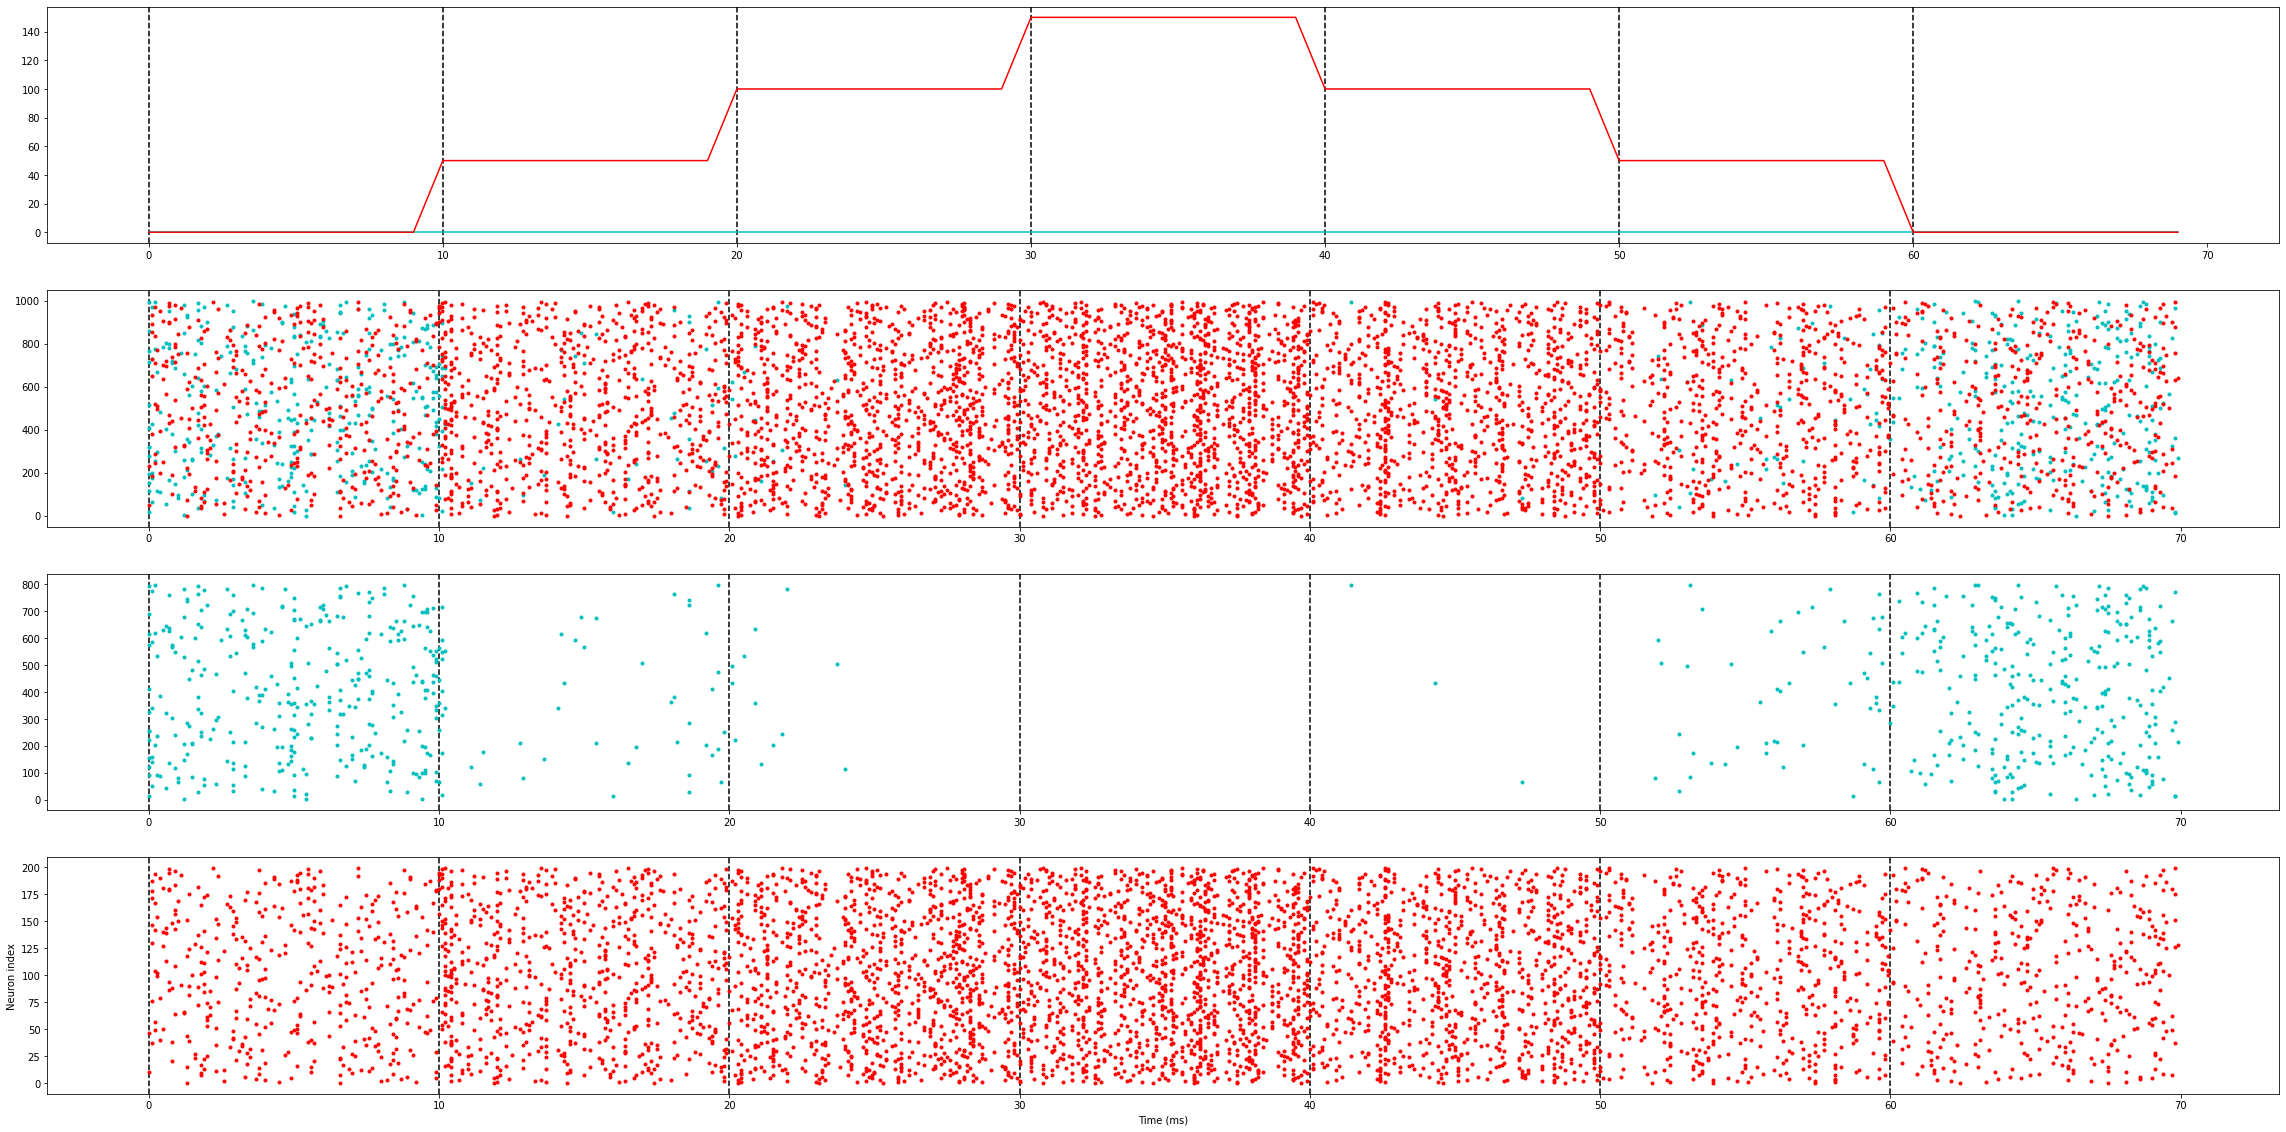

In [50]:
spikemon1 = SpikeMonitor(G1)
spikemon2 = SpikeMonitor(G2)

figure(figsize=(9, 4))
fig, axarr = plt.subplots(4, figsize = (40, 20)) 

for l in range(7):
    run(10*ms)
    for i in range(4):
      axarr[i].axvline(l*10, ls='--', c='k')

axarr[0].plot([stimulus1(t*ms) for t in range(70)], 'c')
axarr[0].plot([stimulus2(t*ms) for t in range(70)], 'r')
axarr[1].plot(spikemon1.t/ms, spikemon1.i*5//4, '.c')
axarr[1].plot(spikemon2.t/ms, spikemon2.i*5, '.r')
axarr[2].plot(spikemon1.t/ms, spikemon1.i, '.c')
axarr[3].plot(spikemon2.t/ms, spikemon2.i, '.r')

xlabel('Time (ms)')
ylabel('Neuron index')